###                                                      Mini Project1
#            Modern Low Footprint Cyber Attack Detection


#### Name: Gowthami Chamarthi (id: 301619981)
#### Name: Anila Veidimalla( id: 301623894)

###  Data Pre Processing

combine the two files(UNSW_NB15_training-set_csc215.csv and UNSW_NB15_test-set_csc215.csv) and create new csv with combined data combined_csv.csv

**Note: 
* Should run the below code only once after placing the UNSW_NB15_training-set_csc215.csv and UNSW_NB15_test-set_csc215.csv
* into a folder C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Files
* combined_csv.csv would be created in the same folder path C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Files

import os

import glob

import pandas as pd

os.chdir(r"C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Files")

extension = 'csv'

all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#### combine all files in the list

combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])

####  export to csv

combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

#### Useful Functions For data Preprocessing

In [275]:
from collections.abc import Sequence
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd



In [276]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


path =r"C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Files"
#Fetch the dataset from combined csv file    
filename = os.path.join(path,"combined_csv.csv")    
#counting no.of rows of combined csv file
file = open(filename)
numline = len(file.readlines())
print (numline)

257674


In [277]:
df = pd.read_csv(filename,na_values=['NA','?','-'])
df

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0            1  0.000011   udp     NaN   INT      2      0     496       0   
1            2  0.000008   udp     NaN   INT      2      0    1762       0   
2            3  0.000005   udp     NaN   INT      2      0    1068       0   
3            4  0.000006   udp     NaN   INT      2      0     900       0   
4            5  0.000010   udp     NaN   INT      2      0    2126       0   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
257668  175337  0.000009   udp     dns   INT      2      0     114       0   
257669  175338  0.505762   tcp     NaN   FIN     10      8     620     354   
257670  175339  0.000009   udp     dns   INT      2      0     114       0   
257671  175340  0.000009   udp     dns   INT      2      0     114       0   
257672  175341  0.000009   udp     dns   INT      2      0     114       0   

                 rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0        90909.090200  ...                 1               2             0   
1       125000.000300  ...                 1               2             0   
2       200000.005100  ...                 1               3             0   
3       166666.660800  ...                 1               3             0   
4       100000.002500  ...                 1               3             0   
...               ...  ...               ...             ...           ...   
257668  111111.107200  ...                13              24             0   
257669      33.612649  ...                 1               2             0   
257670  111111.107200  ...                 3              13             0   
257671  111111.107200  ...                14              30             0   
257672  111111.107200  ...                16              30             0   

        ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0                0                 0           1           2                0   
1                0                 0           1           2                0   
2                0                 0           1           3                0   
3                0                 0           2           3                0   
4                0                 0           2           3                0   
...            ...               ...         ...         ...              ...   
257668           0                 0          24          24                0   
257669           0                 0           1           1                0   
257670           0                 0           3          12                0   
257671           0                 0          30          30                0   
257672           0                 0          30          30                0   

        attack_cat  label  
0           Normal      0  
1           Normal      0  
2           Normal      0  
3           Normal      0  
4           Normal      0  
...            ...    ...  
257668     Generic      1  
257669   Shellcode      1  
257670     Generic      1  
257671     Generic      1  
257672     Generic      1  

[257673 rows x 45 columns]

In [278]:
# return rows with one or more nulls
df[df.isnull().any(axis=1)]

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0            1  0.000011   udp     NaN   INT      2      0     496       0   
1            2  0.000008   udp     NaN   INT      2      0    1762       0   
2            3  0.000005   udp     NaN   INT      2      0    1068       0   
3            4  0.000006   udp     NaN   INT      2      0     900       0   
4            5  0.000010   udp     NaN   INT      2      0    2126       0   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
257457  175126  0.653375   tcp     NaN   FIN     10      8     564     354   
257511  175180  0.695566   tcp     NaN   FIN     10      8     564     354   
257523  175192  0.962856   tcp     NaN   FIN     24     60    1256   59374   
257609  175278  3.719110   tcp     NaN   FIN     66    340    3086  426483   
257669  175338  0.505762   tcp     NaN   FIN     10      8     620     354   

                 rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0        90909.090200  ...                 1               2             0   
1       125000.000300  ...                 1               2             0   
2       200000.005100  ...                 1               3             0   
3       166666.660800  ...                 1               3             0   
4       100000.002500  ...                 1               3             0   
...               ...  ...               ...             ...           ...   
257457      26.018748  ...                 1               1             0   
257511      24.440528  ...                 1               1             0   
257523      86.201883  ...                 1               1             0   
257609     108.897021  ...                 1               1             0   
257669      33.612649  ...                 1               2             0   

        ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0                0                 0           1           2                0   
1                0                 0           1           2                0   
2                0                 0           1           3                0   
3                0                 0           2           3                0   
4                0                 0           2           3                0   
...            ...               ...         ...         ...              ...   
257457           0                 0          18           1                0   
257511           0                 0           3           1                0   
257523           0                 0           1           1                0   
257609           0                 0           2           1                0   
257669           0                 0           1           1                0   

            attack_cat  label  
0               Normal      0  
1               Normal      0  
2               Normal      0  
3               Normal      0  
4               Normal      0  
...                ...    ...  
257457  Reconnaissance      1  
257511  Reconnaissance      1  
257523        Exploits      1  
257609        Exploits      1  
257669       Shellcode      1  

[141321 rows x 45 columns]

In [279]:
#Step-1: Remove Null values
df = df.dropna()
df

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
35          36  0.983874   tcp    http   FIN     10      8     816    1172   
40          41  1.535254   tcp    http   FIN     10     10     826    1266   
45          46  1.059359   tcp    http   FIN     10      8     830    1134   
49          50  0.990548   tcp    http   FIN     10     10     804    1414   
72          73  1.303518   tcp    http   FIN     12      8     898    1120   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
257667  175336  0.000006   udp     dns   INT      2      0     114       0   
257668  175337  0.000009   udp     dns   INT      2      0     114       0   
257670  175339  0.000009   udp     dns   INT      2      0     114       0   
257671  175340  0.000009   udp     dns   INT      2      0     114       0   
257672  175341  0.000009   udp     dns   INT      2      0     114       0   

                 rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
35          17.278635  ...                 1               2             0   
40          12.375802  ...                 1               2             0   
45          16.047441  ...                 1               1             0   
49          19.181301  ...                 1               2             0   
72          14.575939  ...                 1               1             0   
...               ...  ...               ...             ...           ...   
257667  166666.660800  ...                17              45             0   
257668  111111.107200  ...                13              24             0   
257670  111111.107200  ...                 3              13             0   
257671  111111.107200  ...                14              30             0   
257672  111111.107200  ...                16              30             0   

        ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
35               0                 1           1           3                0   
40               0                 1           1           3                0   
45               0                 1           3           1                0   
49               0                 1           1           2                0   
72               0                 1           2           1                0   
...            ...               ...         ...         ...              ...   
257667           0                 0          33          45                0   
257668           0                 0          24          24                0   
257670           0                 0           3          12                0   
257671           0                 0          30          30                0   
257672           0                 0          30          30                0   

        attack_cat  label  
35          Normal      0  
40          Normal      0  
45          Normal      0  
49          Normal      0  
72          Normal      0  
...            ...    ...  
257667     Generic      1  
257668     Generic      1  
257670     Generic      1  
257671     Generic      1  
257672     Generic      1  

[116352 rows x 45 columns]

In [280]:
#Step-2 Encoding Data
#Encode non-target features this way using encode_text_dummy function
#One Hot Encoding 
encode_text_dummy(df, 'proto')
encode_text_dummy(df, 'state')
encode_text_dummy(df, 'service')
encode_text_dummy(df, 'attack_cat')
encode_text_dummy(df, 'is_sm_ips_ports')
# Remove Unnecessary Columns
df.drop('id',1,inplace=True)

#Step-3 Normalization
#Normalization of Numeric Columns
encode_numeric_zscore(df, 'dur')
encode_numeric_zscore(df, 'spkts')
encode_numeric_zscore(df, 'dpkts')
encode_numeric_zscore(df, 'sbytes')
encode_numeric_zscore(df, 'dbytes')
encode_numeric_zscore(df, 'rate')
encode_numeric_zscore(df, 'sttl')
encode_numeric_zscore(df, 'dttl')
encode_numeric_zscore(df, 'sload')
encode_numeric_zscore(df, 'dload')
encode_numeric_zscore(df, 'sloss')
encode_numeric_zscore(df, 'dloss')
encode_numeric_zscore(df, 'sinpkt')
encode_numeric_zscore(df, 'dinpkt')
encode_numeric_zscore(df, 'sjit')
encode_numeric_zscore(df, 'djit')
encode_numeric_zscore(df, 'swin')
encode_numeric_zscore(df, 'stcpb')
encode_numeric_zscore(df, 'dtcpb')
encode_numeric_zscore(df, 'dwin')
encode_numeric_zscore(df, 'tcprtt')
encode_numeric_zscore(df, 'synack')
encode_numeric_zscore(df, 'ackdat')
encode_numeric_zscore(df, 'smean')
encode_numeric_zscore(df, 'dmean')
encode_numeric_zscore(df, 'trans_depth')
encode_numeric_zscore(df, 'response_body_len')
encode_numeric_zscore(df, 'ct_srv_src')
encode_numeric_zscore(df, 'ct_state_ttl')
encode_numeric_zscore(df, 'ct_dst_ltm')
encode_numeric_zscore(df, 'ct_src_dport_ltm')
encode_numeric_zscore(df, 'ct_dst_sport_ltm')
encode_numeric_zscore(df, 'ct_dst_src_ltm')
encode_numeric_zscore(df, 'is_ftp_login')
encode_numeric_zscore(df, 'ct_ftp_cmd')
encode_numeric_zscore(df, 'ct_flw_http_mthd')
encode_numeric_zscore(df, 'ct_src_ltm')
encode_numeric_zscore(df, 'ct_srv_dst')


    

C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [281]:
df

dur     spkts     dpkts    sbytes    dbytes      rate      sttl  \
35      0.045627 -0.054516 -0.069046 -0.052843 -0.071703 -0.632648 -1.059697   
40      0.182080 -0.054516 -0.054114 -0.052801 -0.071172 -0.632677 -1.059697   
45      0.064307 -0.054516 -0.069046 -0.052784 -0.071918 -0.632655 -1.059697   
49      0.047278 -0.054516 -0.054114 -0.052893 -0.070336 -0.632637 -1.059697   
72      0.124731 -0.043516 -0.069046 -0.052498 -0.071997 -0.632664 -1.059697   
...          ...       ...       ...       ...       ...       ...       ...   
257667 -0.197857 -0.098512 -0.128774 -0.055797 -0.078325  0.356980  0.812896   
257668 -0.197857 -0.098512 -0.128774 -0.055797 -0.078325  0.027070  0.812896   
257670 -0.197857 -0.098512 -0.128774 -0.055797 -0.078325  0.027070  0.812896   
257671 -0.197857 -0.098512 -0.128774 -0.055797 -0.078325  0.027070  0.812896   
257672 -0.197857 -0.098512 -0.128774 -0.055797 -0.078325  0.027070  0.812896   

            dttl     sload     dload  ...  attack_cat-Analysis  \
35      1.560517 -0.617408 -0.207230  ...                    0   
40      1.560517 -0.617434 -0.209714  ...                    0   
45      1.560517 -0.617412 -0.208102  ...                    0   
49      1.560517 -0.617409 -0.205225  ...                    0   
72      1.560517 -0.617419 -0.209637  ...                    0   
...          ...       ...       ...  ...                  ...   
257667 -0.712287  0.338041 -0.215856  ...                    0   
257668 -0.712287  0.019533 -0.215856  ...                    0   
257670 -0.712287  0.019533 -0.215856  ...                    0   
257671 -0.712287  0.019533 -0.215856  ...                    0   
257672 -0.712287  0.019533 -0.215856  ...                    0   

        attack_cat-Backdoor  attack_cat-DoS  attack_cat-Exploits  \
35                        0               0                    0   
40                        0               0                    0   
45                        0               0                    0   
49                        0               0                    0   
72                        0               0                    0   
...                     ...             ...                  ...   
257667                    0               0                    0   
257668                    0               0                    0   
257670                    0               0                    0   
257671                    0               0                    0   
257672                    0               0                    0   

        attack_cat-Fuzzers  attack_cat-Generic  attack_cat-Normal  \
35                       0                   0                  1   
40                       0                   0                  1   
45                       0                   0                  1   
49                       0                   0                  1   
72                       0                   0                  1   
...                    ...                 ...                ...   
257667                   0                   1                  0   
257668                   0                   1                  0   
257670                   0                   1                  0   
257671                   0                   1                  0   
257672                   0                   1                  0   

        attack_cat-Reconnaissance  attack_cat-Worms  is_sm_ips_ports-0  
35                              0                 0                  1  
40                              0                 0                  1  
45                              0                 0                  1  
49                              0                 0                  1  
72                              0                 0                  1  
...                           ...               ...                ...  
257667                          0                 0                  1  
257668                       

In [282]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

## Fully Connected Nueral Network

In [283]:
#For Fully Connected Neural Network Produce final feature vectors (x) and expected output (y)
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)



In [284]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

#For Fully Connected Neural Network Produce final feature vectors (x) and expected output (y)
x,y = to_xy(df,"label")

In [285]:
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.32, random_state=42) 

In [286]:
x_train.shape

(79119, 68)

In [287]:
y_train.shape

(79119, 2)

In [288]:
x_test.shape

(37233, 68)

In [289]:
y_test.shape

(37233, 2)

In [290]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

##  Training Neural Network with activation function as tanh and optimizer as sgd

In [291]:
#activation function as tanh optimizer as sgd
# Define ModelCheckpoint outside the loop
checkpointer = ModelCheckpoint(filepath=r"C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\bst_weights_f_1.hdf5", verbose=2, save_best_only=True) # save best model

for i in range(5):
    print(i)
    
    # Build network
    model = Sequential()
    model.add(Dense(10, input_dim=x.shape[1], activation='tanh'))
    model.add(Dense(5, activation='tanh'))
    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=100)



0
Train on 79119 samples, validate on 37233 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.02300, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\bst_weights_f_1.hdf5
79119/79119 - 8s - loss: 0.1027 - val_loss: 0.0230
Epoch 2/100

Epoch 00002: val_loss improved from 0.02300 to 0.00612, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\bst_weights_f_1.hdf5
79119/79119 - 6s - loss: 0.0114 - val_loss: 0.0061
Epoch 3/100

Epoch 00003: val_loss improved from 0.00612 to 0.00326, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\bst_weights_f_1.hdf5
79119/79119 - 6s - loss: 0.0045 - val_loss: 0.0033
Epoch 4/100

Epoch 00004: val_loss improved from 0.00326 to 0.00230, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\bst_weights_f_1.hdf5
79119/79119 - 6s - loss: 0.0029 - val_loss: 0.0023
Epoch 5/100

Epoch 00005: val_loss improved 

In [292]:
print('Training finished...Loading the best model')  
print()
model.load_weights(r"C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\bst_weights_f_1.hdf5") 
# load weights from best model

# Measure accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y_test,axis=1)

score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))

Training finished...Loading the best model

Final accuracy: 0.9998388526307308


[[ 9389     4]
 [    2 27838]]
Plotting confusion matrix


C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


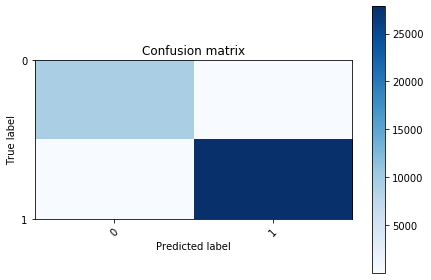

Precision score : 0.999856332160046
Recall score    : 0.9999281609195402
F1 score        : 0.9998922452498115

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9393
           1       1.00      1.00      1.00     27840

    accuracy                           1.00     37233
   macro avg       1.00      1.00      1.00     37233
weighted avg       1.00      1.00      1.00     37233



In [297]:
import numpy as np
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix for Fully connected Nueral Network model
cm = confusion_matrix(y_true, pred)
print(cm)

label = encode_text_index(df,"label")
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, label)
plt.show()

#Precision
pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

#Recall
re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

#F1 Score
f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

print(classification_report(y_true, pred))

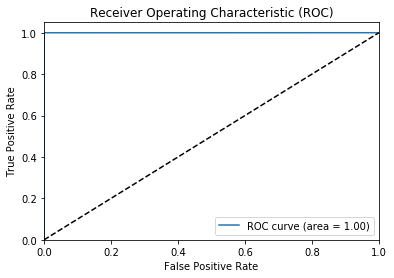

In [298]:
#Plot ROC Curve for Fully Connected Nueral Network
pred = model.predict(x_test)
pred = pred[:,1] # Only positive class (M)
plot_roc(pred,y_true)

## Training Neural Network with activation function as sigmoid optimizer as sgd

In [299]:
#activation function as sigmoid optimizer as sgd
# Define ModelCheckpoint outside the loop
checkpointer = ModelCheckpoint(filepath=r"C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f2.hdf5", verbose=2, save_best_only=True) # save best model

for i in range(5):
    print(i)
    
    # Build network
    model = Sequential()
    model.add(Dense(20, input_dim=x.shape[1], activation='sigmoid'))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Dense(6, activation='sigmoid'))
    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=100)



0
Train on 79119 samples, validate on 37233 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.55152, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f2.hdf5
79119/79119 - 6s - loss: 0.5562 - val_loss: 0.5515
Epoch 2/100

Epoch 00002: val_loss improved from 0.55152 to 0.47520, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f2.hdf5
79119/79119 - 5s - loss: 0.5228 - val_loss: 0.4752
Epoch 3/100

Epoch 00003: val_loss improved from 0.47520 to 0.21702, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f2.hdf5
79119/79119 - 5s - loss: 0.3454 - val_loss: 0.2170
Epoch 4/100

Epoch 00004: val_loss improved from 0.21702 to 0.09215, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f2.hdf5
79119/79119 - 5s - loss: 0.1423 - val_loss: 0.0921


Epoch 11/100

Epoch 00011: val_loss did not improve from 0.00323
79119/79119 - 5s - loss: 0.0041 - val_loss: 0.0040
Epoch 12/100

Epoch 00012: val_loss did not improve from 0.00323
79119/79119 - 5s - loss: 0.0035 - val_loss: 0.0035
Epoch 13/100

Epoch 00013: val_loss improved from 0.00323 to 0.00310, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f2.hdf5
79119/79119 - 5s - loss: 0.0031 - val_loss: 0.0031
Epoch 00013: early stopping
4
Train on 79119 samples, validate on 37233 samples
Epoch 1/100

Epoch 00001: val_loss did not improve from 0.00310
79119/79119 - 6s - loss: 0.5541 - val_loss: 0.5335
Epoch 2/100

Epoch 00002: val_loss did not improve from 0.00310
79119/79119 - 5s - loss: 0.4610 - val_loss: 0.3533
Epoch 3/100

Epoch 00003: val_loss did not improve from 0.00310
79119/79119 - 5s - loss: 0.2223 - val_loss: 0.1393
Epoch 4/100

Epoch 00004: val_loss did not improve from 0.00310
79119/79119 - 5s - loss: 0.0931 - val_lo

In [300]:
print('Training finished...Loading the best model')  
print()
model.load_weights(r"C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f2.hdf5") 
# load weights from best model

# Measure accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y_test,axis=1)

score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))

Training finished...Loading the best model

Final accuracy: 0.999865710525609


[[ 9388     5]
 [    0 27840]]
Plotting confusion matrix


C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


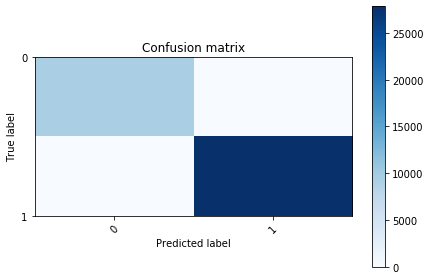

Precision score : 0.9998204345483929
Recall score    : 1.0
F1 score        : 0.9999102092125347

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9393
           1       1.00      1.00      1.00     27840

    accuracy                           1.00     37233
   macro avg       1.00      1.00      1.00     37233
weighted avg       1.00      1.00      1.00     37233



In [301]:
import numpy as np

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix for Fully connected Nueral Network model
cm = confusion_matrix(y_true, pred)
print(cm)

label = encode_text_index(df,"label")
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, label)
plt.show()

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

print(classification_report(y_true, pred))

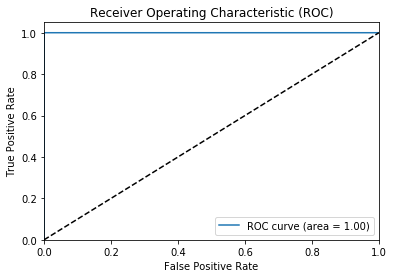

In [302]:
#Plot ROC Curve for Fully Connected Nueral Network
pred = model.predict(x_test)
pred = pred[:,1] # Only positive class (M)
plot_roc(pred,y_true)

## Training Neural Network with activation function as relu and optimizer as adam


In [303]:
# Define ModelCheckpoint outside the loop
checkpointer = ModelCheckpoint(filepath=r"C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f3.hdf5", verbose=2, save_best_only=True) # save best model

for i in range(5):
    print(i)
    
    # Build network
    model = Sequential()
    model.add(Dense(20, input_dim=x.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=100)


0
Train on 79119 samples, validate on 37233 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.00049, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f3.hdf5
79119/79119 - 6s - loss: 0.0614 - val_loss: 4.8701e-04
Epoch 2/100

Epoch 00002: val_loss improved from 0.00049 to 0.00025, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f3.hdf5
79119/79119 - 6s - loss: 0.0012 - val_loss: 2.5266e-04
Epoch 3/100

Epoch 00003: val_loss improved from 0.00025 to 0.00006, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f3.hdf5
79119/79119 - 6s - loss: 4.1256e-04 - val_loss: 5.9846e-05
Epoch 00003: early stopping
1
Train on 79119 samples, validate on 37233 samples
Epoch 1/100

Epoch 00001: val_loss did not improve from 0.00006
79119/79119 - 6s - loss: 0.0766 - val_loss: 0.0157
Epoch 2/100

Epoch 00002: v

In [304]:
print('Training finished...Loading the best model')  
print()
model.load_weights(r"C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f3.hdf5") 
# load weights from best model

# Measure accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y_test,axis=1)

score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))

Training finished...Loading the best model

Final accuracy: 1.0


[[ 9393     0]
 [    0 27840]]
Precision score : 1.0
Recall score    : 1.0
F1 score        : 1.0

Plotting confusion matrix


C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


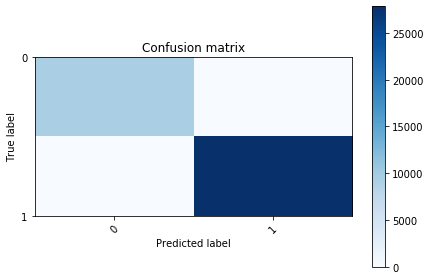

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9393
           1       1.00      1.00      1.00     27840

    accuracy                           1.00     37233
   macro avg       1.00      1.00      1.00     37233
weighted avg       1.00      1.00      1.00     37233



In [305]:
import numpy as np

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix for Fully connected Nueral Network model
cm = confusion_matrix(y_true, pred)
print(cm)

p_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(p_score))

r_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(r_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()
label = encode_text_index(df,"label")
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, label)
plt.show()

print(classification_report(y_true, pred))

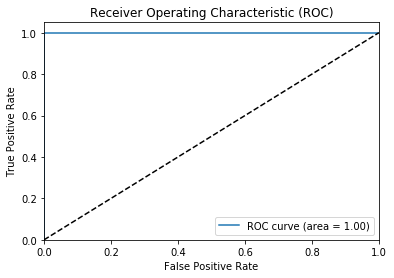

In [306]:
#Plot ROC Curve for Fully Connected Nueral Network
pred = model.predict(x_test)
pred = pred[:,1] # Only positive class (M)
plot_roc(pred,y_true)

## Training Neural Network with activation function as relu and optimizer as sgd

In [307]:
# Define ModelCheckpoint outside the loop
checkpointer = ModelCheckpoint(filepath=r"C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f4.hdf5", verbose=2, save_best_only=True) # save best model

for i in range(5):
    print(i)
    
    # Build network
    model = Sequential()
    model.add(Dense(20, input_dim=x.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=100)


0
Train on 79119 samples, validate on 37233 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.00923, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f4.hdf5
79119/79119 - 6s - loss: 0.1223 - val_loss: 0.0092
Epoch 2/100

Epoch 00002: val_loss improved from 0.00923 to 0.00306, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f4.hdf5
79119/79119 - 6s - loss: 0.0049 - val_loss: 0.0031
Epoch 3/100

Epoch 00003: val_loss improved from 0.00306 to 0.00179, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f4.hdf5
79119/79119 - 5s - loss: 0.0021 - val_loss: 0.0018
Epoch 4/100

Epoch 00004: val_loss improved from 0.00179 to 0.00164, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f4.hdf5
79119/79119 - 6s - loss: 0.0015 - val_loss: 0.0016


In [308]:
print('Training finished...Loading the best model')  
print()
model.load_weights(r"C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f4.hdf5") 
# load weights from best model

# Measure accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y_test,axis=1)

score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))

Training finished...Loading the best model

Final accuracy: 0.9998925684204872


[[ 9389     4]
 [    0 27840]]
Precision score : 0.9998563424795288
Recall score    : 1.0
F1 score        : 0.999928166080023

Plotting confusion matrix


C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


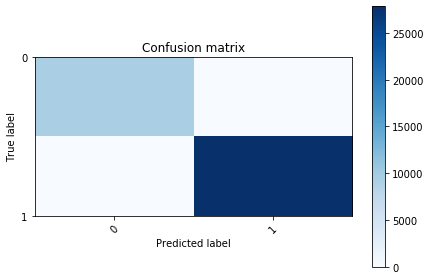

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9393
           1       1.00      1.00      1.00     27840

    accuracy                           1.00     37233
   macro avg       1.00      1.00      1.00     37233
weighted avg       1.00      1.00      1.00     37233



In [309]:
import numpy as np

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix for Fully connected Nueral Network model
cm = confusion_matrix(y_true, pred)
print(cm)

precission = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(precission))

recall = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(recall))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()
label = encode_text_index(df,"label")
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, label)
plt.show()

print(classification_report(y_true, pred))

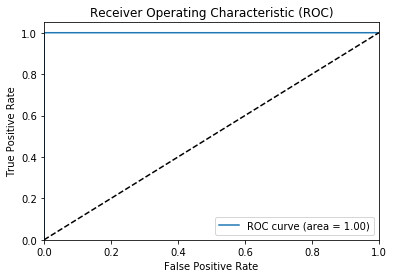

In [310]:
#Plot ROC Curve for Fully Connected Nueral Network
pred = model.predict(x_test)
pred = pred[:,1] # Only positive class (M)
plot_roc(pred,y_true)

## Training Neural Network with activation function as tanh and optimizer as adam

In [311]:
# Define ModelCheckpoint outside the loop
checkpointer = ModelCheckpoint(filepath=r"C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f7.hdf5", verbose=2, save_best_only=True) # save best model

for i in range(5):
    print(i)
    
    # Build network
    model = Sequential()
    model.add(Dense(20, input_dim=x.shape[1], activation='tanh'))
    model.add(Dense(5, activation='tanh'))
    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=100)


0
Train on 79119 samples, validate on 37233 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.00114, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f7.hdf5
79119/79119 - 6s - loss: 0.0315 - val_loss: 0.0011
Epoch 2/100

Epoch 00002: val_loss improved from 0.00114 to 0.00030, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f7.hdf5
79119/79119 - 5s - loss: 8.3054e-04 - val_loss: 3.0010e-04
Epoch 3/100

Epoch 00003: val_loss improved from 0.00030 to 0.00016, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f7.hdf5
79119/79119 - 6s - loss: 7.9335e-04 - val_loss: 1.5830e-04
Epoch 00003: early stopping
1
Train on 79119 samples, validate on 37233 samples
Epoch 1/100

Epoch 00001: val_loss did not improve from 0.00016
79119/79119 - 6s - loss: 0.0192 - val_loss: 0.0015
Epoch 2/100

Epoch 00002: v

In [312]:
print('Training finished...Loading the best model')  
print()
model.load_weights(r"C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f7.hdf5") 
# load weights from best model

# Measure accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y_test,axis=1)

score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))

Training finished...Loading the best model

Final accuracy: 1.0


[[ 9393     0]
 [    0 27840]]
Precision score : 1.0
Recall score    : 1.0
F1 score        : 1.0

Plotting confusion matrix


C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


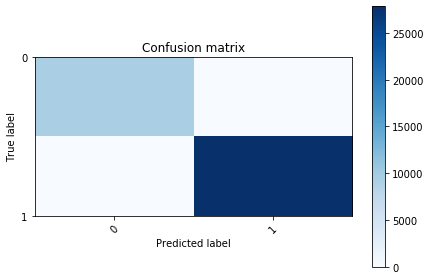

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9393
           1       1.00      1.00      1.00     27840

    accuracy                           1.00     37233
   macro avg       1.00      1.00      1.00     37233
weighted avg       1.00      1.00      1.00     37233



In [313]:
import numpy as np

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix for Fully connected Nueral Network model
cm = confusion_matrix(y_true, pred)
print(cm)

pr = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr))

recall = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(recall))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()
label = encode_text_index(df,"label")
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, label)
plt.show()

print(classification_report(y_true, pred))

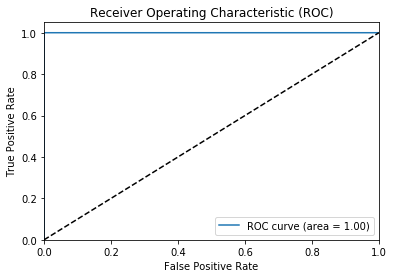

In [314]:
#Plot ROC Curve for Fully Connected Nueral Network
pred = model.predict(x_test)
pred = pred[:,1] # Only positive class (M)
plot_roc(pred,y_true)

## Training Neural Network using activation function as sigmoid and optimizer as adam

In [315]:
# Define ModelCheckpoint outside the loop
checkpointer = ModelCheckpoint(filepath=r"C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f6.hdf5", verbose=2, save_best_only=True) # save best model

for i in range(5):
    print(i)
    
    # Build network
    model = Sequential()
    model.add(Dense(40, input_dim=x.shape[1], activation='tanh'))
    
    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=100)


0
Train on 79119 samples, validate on 37233 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.00073, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f6.hdf5
79119/79119 - 6s - loss: 0.0202 - val_loss: 7.2839e-04
Epoch 2/100

Epoch 00002: val_loss improved from 0.00073 to 0.00020, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f6.hdf5
79119/79119 - 5s - loss: 5.4459e-04 - val_loss: 1.9805e-04
Epoch 3/100

Epoch 00003: val_loss did not improve from 0.00020
79119/79119 - 5s - loss: 2.3676e-04 - val_loss: 0.0010
Epoch 00003: early stopping
1
Train on 79119 samples, validate on 37233 samples
Epoch 1/100

Epoch 00001: val_loss did not improve from 0.00020
79119/79119 - 6s - loss: 0.0193 - val_loss: 5.1404e-04
Epoch 2/100

Epoch 00002: val_loss improved from 0.00020 to 0.00010, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\p

In [316]:
print('Training finished...Loading the best model')  
print()
model.load_weights(r"C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Bestweights\bst_weights_f6.hdf5") 
# load weights from best model

# Measure accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y_test,axis=1)

score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))

Training finished...Loading the best model

Final accuracy: 1.0


[[ 9393     0]
 [    0 27840]]
Precision score : 1.0
Recall score    : 1.0
F1 score        : 1.0

Plotting confusion matrix


C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


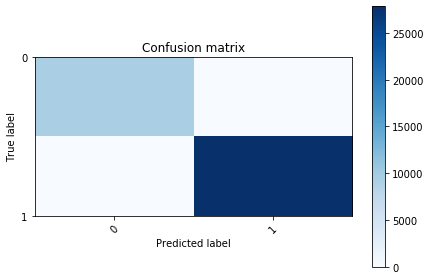

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9393
           1       1.00      1.00      1.00     27840

    accuracy                           1.00     37233
   macro avg       1.00      1.00      1.00     37233
weighted avg       1.00      1.00      1.00     37233



In [317]:
import numpy as np

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix for Fully connected Nueral Network model
cm = confusion_matrix(y_true, pred)
print(cm)

pr = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr))

re = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()
label = encode_text_index(df,"label")
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, label)
plt.show()

print(classification_report(y_true, pred))

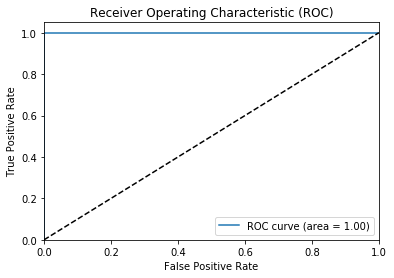

In [318]:
#Plot ROC Curve for Fully Connected Nueral Network
pred = model.predict(x_test)
pred = pred[:,1] # Only positive class (M)
plot_roc(pred,y_true)

## LOGISTIC REGRESSION

In [319]:
#Modified to_xy to get 1D y 
def to_XY(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)


In [320]:
x,y = to_XY(df,"label")

In [321]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.32,random_state=0)

In [322]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [323]:
y_pred=logreg.predict(x_test)

In [324]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,y_pred)
accuracy

1.0

[[ 9194     0]
 [    0 28039]]
Precision score : 1.0
Recall score    : 1.0
F1 score        : 1.0

Plotting confusion matrix


C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


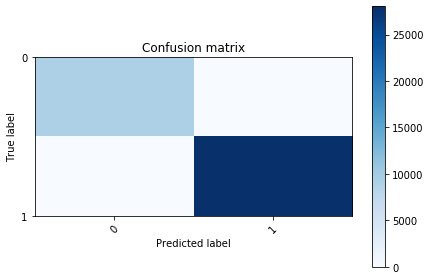

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9194
         1.0       1.00      1.00      1.00     28039

    accuracy                           1.00     37233
   macro avg       1.00      1.00      1.00     37233
weighted avg       1.00      1.00      1.00     37233



In [325]:
import numpy as np

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix for Fully connected Nueral Network model
cm = confusion_matrix(y_test, y_pred)
print(cm)

pr= metrics.precision_score(y_test, y_pred)
print("Precision score : {}".format(pr))

re= metrics.recall_score(y_test, y_pred)
print("Recall score    : {}".format(re))

f1_score = metrics.f1_score(y_test, y_pred)
print("F1 score        : {}".format(f1_score))

print()
label = encode_text_index(df,"label")
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, label)
plt.show()

print(classification_report(y_test, y_pred))

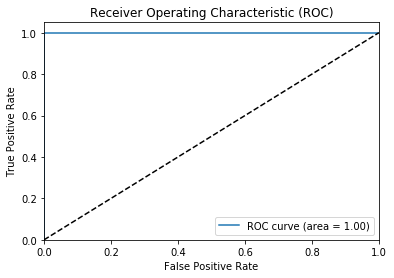

In [326]:
pred = logreg.predict(x_test)

plot_roc(y_pred,y_test)

## KNN

In [327]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [328]:
knn = KNeighborsClassifier(n_neighbors=10)

In [329]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [331]:
# predict the response for new observations
y_pred=knn.predict(x_test)

In [332]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test,y_pred)
print(accuracy)

0.9968576262992507


[[ 9159    35]
 [   82 27957]]
Precision score : 0.9987496427550728
Recall score    : 0.9970755019793859
F1 score        : 0.9979118702147026

Plotting confusion matrix


C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


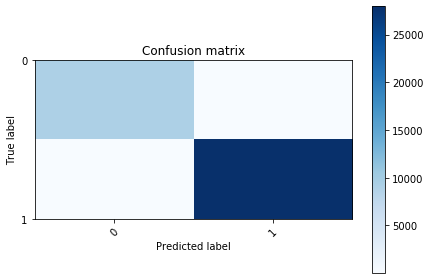

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      9194
         1.0       1.00      1.00      1.00     28039

    accuracy                           1.00     37233
   macro avg       0.99      1.00      1.00     37233
weighted avg       1.00      1.00      1.00     37233



In [333]:
import numpy as np

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix for Fully connected Nueral Network model
cm = confusion_matrix(y_test, y_pred)
print(cm)

pr = metrics.precision_score(y_test, y_pred)
print("Precision score : {}".format(pr))

re = metrics.recall_score(y_test, y_pred)
print("Recall score    : {}".format(re))

f1_score = metrics.f1_score(y_test, y_pred)
print("F1 score        : {}".format(f1_score))

print()
label = encode_text_index(df,"label")
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, label)
plt.show()

print(classification_report(y_test, y_pred))

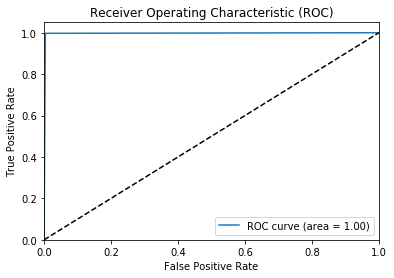

In [334]:
plot_roc(y_pred,y_test)

## SVM

In [335]:
#SVM

x,y = to_XY(df,"label")

In [336]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.32,random_state=0)

In [337]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
#svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)[source]¶
clf = svm.SVC(kernel='linear',max_iter=500, degree=3, probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [338]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


[[ 9194     0]
 [    0 28039]]
Precision score : 1.0
Recall score    : 1.0
F1 score        : 1.0

Plotting confusion matrix


C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


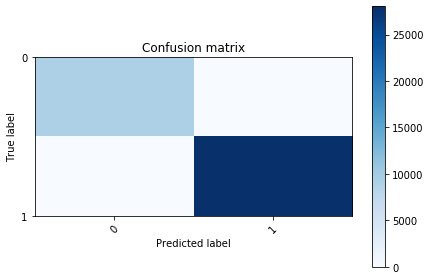

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9194
         1.0       1.00      1.00      1.00     28039

    accuracy                           1.00     37233
   macro avg       1.00      1.00      1.00     37233
weighted avg       1.00      1.00      1.00     37233



In [339]:
import numpy as np

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix for Fully connected Nueral Network model
cm = confusion_matrix(y_test, y_pred)
print(cm)

pr_score = metrics.precision_score(y_test, y_pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_test, y_pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_test, y_pred)
print("F1 score        : {}".format(f1_score))

print()
label = encode_text_index(df,"label")
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, label)
plt.show()

print(classification_report(y_test, y_pred))

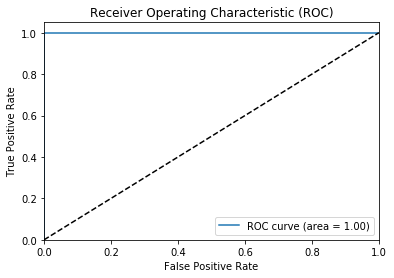

In [340]:
plot_roc(y_pred,y_test)

In [341]:
clf1 = svm.SVC(kernel='poly',max_iter=500, degree=8, probability=True) # Linear Kernel

#Train the model using the training sets
clf1.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf1.predict(x_test)

C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [342]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7530147987000779


[[    5  9189]
 [    7 28032]]
Precision score : 0.7531232368824051
Recall score    : 0.9997503477299475
F1 score        : 0.8590867300030647

Plotting confusion matrix


C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


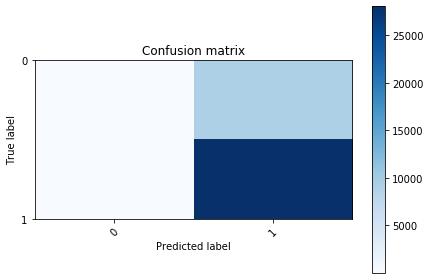

              precision    recall  f1-score   support

         0.0       0.42      0.00      0.00      9194
         1.0       0.75      1.00      0.86     28039

    accuracy                           0.75     37233
   macro avg       0.58      0.50      0.43     37233
weighted avg       0.67      0.75      0.65     37233



In [343]:
import numpy as np

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix for Fully connected Nueral Network model
cm = confusion_matrix(y_test, y_pred)
print(cm)

pr_score = metrics.precision_score(y_test, y_pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_test, y_pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_test, y_pred)
print("F1 score        : {}".format(f1_score))

print()
label = encode_text_index(df,"label")
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, label)
plt.show()

print(classification_report(y_test, y_pred))

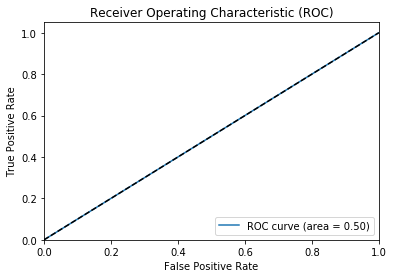

In [344]:
plot_roc(y_pred,y_test)

In [345]:
clf2 = svm.SVC(kernel='rbf',max_iter=500, degree=3, probability=True) # Linear Kernel

#Train the model using the training sets
clf2.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf2.predict(x_test)

C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [346]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9998388526307308


[[ 9188     6]
 [    0 28039]]
Precision score : 0.9997860581208772
Recall score    : 1.0
F1 score        : 0.9998930176164325

Plotting confusion matrix


C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


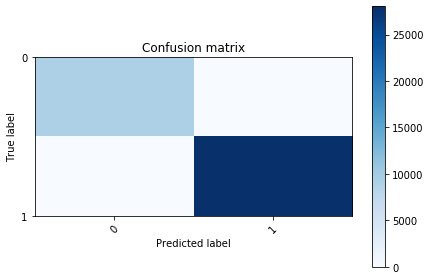

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9194
         1.0       1.00      1.00      1.00     28039

    accuracy                           1.00     37233
   macro avg       1.00      1.00      1.00     37233
weighted avg       1.00      1.00      1.00     37233



In [347]:
import numpy as np

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix for Fully connected Nueral Network model
cm = confusion_matrix(y_test, y_pred)
print(cm)

pr_score = metrics.precision_score(y_test, y_pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_test, y_pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_test, y_pred)
print("F1 score        : {}".format(f1_score))

print()
label = encode_text_index(df,"label")
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, label)
plt.show()

print(classification_report(y_test, y_pred))

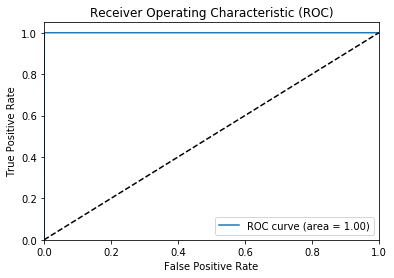

In [348]:
plot_roc(y_pred,y_test)

# Extra Features

**Multi classifier 

In [349]:
# Set the desired TensorFlow output level for this example
# tf.logging.set_verbosity(tf.logging.ERROR)

path =r"C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\Files"
    
filename = os.path.join(path,"combined_csv.csv")    
df1 = pd.read_csv(filename,na_values=['NA','?','-'])
#df1 = pd.read_csv(filename,na_values=['NA','?'])

df1


id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0            1  0.000011   udp     NaN   INT      2      0     496       0   
1            2  0.000008   udp     NaN   INT      2      0    1762       0   
2            3  0.000005   udp     NaN   INT      2      0    1068       0   
3            4  0.000006   udp     NaN   INT      2      0     900       0   
4            5  0.000010   udp     NaN   INT      2      0    2126       0   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
257668  175337  0.000009   udp     dns   INT      2      0     114       0   
257669  175338  0.505762   tcp     NaN   FIN     10      8     620     354   
257670  175339  0.000009   udp     dns   INT      2      0     114       0   
257671  175340  0.000009   udp     dns   INT      2      0     114       0   
257672  175341  0.000009   udp     dns   INT      2      0     114       0   

                 rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0        90909.090200  ...                 1               2             0   
1       125000.000300  ...                 1               2             0   
2       200000.005100  ...                 1               3             0   
3       166666.660800  ...                 1               3             0   
4       100000.002500  ...                 1               3             0   
...               ...  ...               ...             ...           ...   
257668  111111.107200  ...                13              24             0   
257669      33.612649  ...                 1               2             0   
257670  111111.107200  ...                 3              13             0   
257671  111111.107200  ...                14              30             0   
257672  111111.107200  ...                16              30             0   

        ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0                0                 0           1           2                0   
1                0                 0           1           2                0   
2                0                 0           1           3                0   
3                0                 0           2           3                0   
4                0                 0           2           3                0   
...            ...               ...         ...         ...              ...   
257668           0                 0          24          24                0   
257669           0                 0           1           1                0   
257670           0                 0           3          12                0   
257671           0                 0          30          30                0   
257672           0                 0          30          30                0   

        attack_cat  label  
0           Normal      0  
1           Normal      0  
2           Normal      0  
3           Normal      0  
4           Normal      0  
...            ...    ...  
257668     Generic      1  
257669   Shellcode      1  
257670     Generic      1  
257671     Generic      1  
257672     Generic      1  

[257673 rows x 45 columns]

In [350]:
df1[df1.isnull().any(axis=1)]

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0            1  0.000011   udp     NaN   INT      2      0     496       0   
1            2  0.000008   udp     NaN   INT      2      0    1762       0   
2            3  0.000005   udp     NaN   INT      2      0    1068       0   
3            4  0.000006   udp     NaN   INT      2      0     900       0   
4            5  0.000010   udp     NaN   INT      2      0    2126       0   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
257457  175126  0.653375   tcp     NaN   FIN     10      8     564     354   
257511  175180  0.695566   tcp     NaN   FIN     10      8     564     354   
257523  175192  0.962856   tcp     NaN   FIN     24     60    1256   59374   
257609  175278  3.719110   tcp     NaN   FIN     66    340    3086  426483   
257669  175338  0.505762   tcp     NaN   FIN     10      8     620     354   

                 rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0        90909.090200  ...                 1               2             0   
1       125000.000300  ...                 1               2             0   
2       200000.005100  ...                 1               3             0   
3       166666.660800  ...                 1               3             0   
4       100000.002500  ...                 1               3             0   
...               ...  ...               ...             ...           ...   
257457      26.018748  ...                 1               1             0   
257511      24.440528  ...                 1               1             0   
257523      86.201883  ...                 1               1             0   
257609     108.897021  ...                 1               1             0   
257669      33.612649  ...                 1               2             0   

        ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0                0                 0           1           2                0   
1                0                 0           1           2                0   
2                0                 0           1           3                0   
3                0                 0           2           3                0   
4                0                 0           2           3                0   
...            ...               ...         ...         ...              ...   
257457           0                 0          18           1                0   
257511           0                 0           3           1                0   
257523           0                 0           1           1                0   
257609           0                 0           2           1                0   
257669           0                 0           1           1                0   

            attack_cat  label  
0               Normal      0  
1               Normal      0  
2               Normal      0  
3               Normal      0  
4               Normal      0  
...                ...    ...  
257457  Reconnaissance      1  
257511  Reconnaissance      1  
257523        Exploits      1  
257609        Exploits      1  
257669       Shellcode      1  

[141321 rows x 45 columns]

In [351]:
df1=df1.dropna()
df1

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
35          36  0.983874   tcp    http   FIN     10      8     816    1172   
40          41  1.535254   tcp    http   FIN     10     10     826    1266   
45          46  1.059359   tcp    http   FIN     10      8     830    1134   
49          50  0.990548   tcp    http   FIN     10     10     804    1414   
72          73  1.303518   tcp    http   FIN     12      8     898    1120   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
257667  175336  0.000006   udp     dns   INT      2      0     114       0   
257668  175337  0.000009   udp     dns   INT      2      0     114       0   
257670  175339  0.000009   udp     dns   INT      2      0     114       0   
257671  175340  0.000009   udp     dns   INT      2      0     114       0   
257672  175341  0.000009   udp     dns   INT      2      0     114       0   

                 rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
35          17.278635  ...                 1               2             0   
40          12.375802  ...                 1               2             0   
45          16.047441  ...                 1               1             0   
49          19.181301  ...                 1               2             0   
72          14.575939  ...                 1               1             0   
...               ...  ...               ...             ...           ...   
257667  166666.660800  ...                17              45             0   
257668  111111.107200  ...                13              24             0   
257670  111111.107200  ...                 3              13             0   
257671  111111.107200  ...                14              30             0   
257672  111111.107200  ...                16              30             0   

        ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
35               0                 1           1           3                0   
40               0                 1           1           3                0   
45               0                 1           3           1                0   
49               0                 1           1           2                0   
72               0                 1           2           1                0   
...            ...               ...         ...         ...              ...   
257667           0                 0          33          45                0   
257668           0                 0          24          24                0   
257670           0                 0           3          12                0   
257671           0                 0          30          30                0   
257672           0                 0          30          30                0   

        attack_cat  label  
35          Normal      0  
40          Normal      0  
45          Normal      0  
49          Normal      0  
72          Normal      0  
...            ...    ...  
257667     Generic      1  
257668     Generic      1  
257670     Generic      1  
257671     Generic      1  
257672     Generic      1  

[116352 rows x 45 columns]

In [352]:
encode_text_dummy(df1, 'proto')
encode_text_dummy(df1, 'state')
encode_text_dummy(df1, 'service')
encode_text_dummy(df1,'is_sm_ips_ports')
#encode_text_dummy(df, 'attack_cat')
#encode_text_index(df,"label")
attack_cat = encode_text_index(df1,"attack_cat")

df1.drop('id',1,inplace=True)
df1.drop('label',1,inplace=True)

encode_numeric_zscore(df1, 'dur')
encode_numeric_zscore(df1, 'spkts')
encode_numeric_zscore(df1, 'dpkts')
encode_numeric_zscore(df1, 'sbytes')
encode_numeric_zscore(df1, 'dbytes')
encode_numeric_zscore(df1, 'rate')
encode_numeric_zscore(df1, 'sttl')
encode_numeric_zscore(df1, 'dttl')
encode_numeric_zscore(df1, 'sload')
encode_numeric_zscore(df1, 'dload')
encode_numeric_zscore(df1, 'sloss')
encode_numeric_zscore(df1, 'dloss')
encode_numeric_zscore(df1, 'sinpkt')
encode_numeric_zscore(df1, 'dinpkt')
encode_numeric_zscore(df1, 'sjit')
encode_numeric_zscore(df1, 'djit')
encode_numeric_zscore(df1, 'swin')
encode_numeric_zscore(df1, 'stcpb')
encode_numeric_zscore(df1, 'dtcpb')
encode_numeric_zscore(df1, 'dwin')
encode_numeric_zscore(df1, 'tcprtt')
encode_numeric_zscore(df1, 'synack')
encode_numeric_zscore(df1, 'ackdat')
encode_numeric_zscore(df1, 'smean')
encode_numeric_zscore(df1, 'dmean')
encode_numeric_zscore(df1, 'trans_depth')
encode_numeric_zscore(df1, 'response_body_len')
encode_numeric_zscore(df1, 'ct_srv_src')
encode_numeric_zscore(df1, 'ct_state_ttl')
encode_numeric_zscore(df1, 'ct_dst_ltm')
encode_numeric_zscore(df1, 'ct_src_dport_ltm')
encode_numeric_zscore(df1, 'ct_dst_sport_ltm')
encode_numeric_zscore(df1, 'ct_dst_src_ltm')
encode_numeric_zscore(df1, 'is_ftp_login')
encode_numeric_zscore(df1, 'ct_ftp_cmd')
encode_numeric_zscore(df1, 'ct_flw_http_mthd')
encode_numeric_zscore(df1, 'ct_src_ltm')
encode_numeric_zscore(df1, 'ct_srv_dst')




C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\chama\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [353]:
df1

dur     spkts     dpkts    sbytes    dbytes      rate      sttl  \
35      0.045627 -0.054516 -0.069046 -0.052843 -0.071703 -0.632648 -1.059697   
40      0.182080 -0.054516 -0.054114 -0.052801 -0.071172 -0.632677 -1.059697   
45      0.064307 -0.054516 -0.069046 -0.052784 -0.071918 -0.632655 -1.059697   
49      0.047278 -0.054516 -0.054114 -0.052893 -0.070336 -0.632637 -1.059697   
72      0.124731 -0.043516 -0.069046 -0.052498 -0.071997 -0.632664 -1.059697   
...          ...       ...       ...       ...       ...       ...       ...   
257667 -0.197857 -0.098512 -0.128774 -0.055797 -0.078325  0.356980  0.812896   
257668 -0.197857 -0.098512 -0.128774 -0.055797 -0.078325  0.027070  0.812896   
257670 -0.197857 -0.098512 -0.128774 -0.055797 -0.078325  0.027070  0.812896   
257671 -0.197857 -0.098512 -0.128774 -0.055797 -0.078325  0.027070  0.812896   
257672 -0.197857 -0.098512 -0.128774 -0.055797 -0.078325  0.027070  0.812896   

            dttl     sload     dload  ...  service-ftp-data  service-http  \
35      1.560517 -0.617408 -0.207230  ...                 0             1   
40      1.560517 -0.617434 -0.209714  ...                 0             1   
45      1.560517 -0.617412 -0.208102  ...                 0             1   
49      1.560517 -0.617409 -0.205225  ...                 0             1   
72      1.560517 -0.617419 -0.209637  ...                 0             1   
...          ...       ...       ...  ...               ...           ...   
257667 -0.712287  0.338041 -0.215856  ...                 0             0   
257668 -0.712287  0.019533 -0.215856  ...                 0             0   
257670 -0.712287  0.019533 -0.215856  ...                 0             0   
257671 -0.712287  0.019533 -0.215856  ...                 0             0   
257672 -0.712287  0.019533 -0.215856  ...                 0             0   

        service-irc  service-pop3  service-radius  service-smtp  service-snmp  \
35                0             0               0             0             0   
40                0             0               0             0             0   
45                0             0               0             0             0   
49                0             0               0             0             0   
72                0             0               0             0             0   
...             ...           ...             ...           ...           ...   
257667            0             0               0             0             0   
257668            0             0               0             0             0   
257670            0             0               0             0             0   
257671            0             0               0             0             0   
257672            0             0               0             0             0   

        service-ssh  service-ssl  is_sm_ips_ports-0  
35                0            0                  1  
40                0            0                  1  
45                0            0                  1  
49                0            0                  1  
72                0            0                  1  
...             ...          ...                ...  
257667            0            0                  1  
257668            0            0                  1  
257670            0            0                  1  
257671            0            0                  1  
257672            0            0                  1  

[116352 rows x 60 columns]

In [354]:
x,y = to_xy(df1,"attack_cat")

In [355]:

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.34, random_state=42)

model = Sequential()
model.add(Dense(20, input_dim=x.shape[1], activation='relu'))
model.add(Dense(10))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto')
checkpointer = ModelCheckpoint(filepath=r"C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\bstw_extra2.hdf5", verbose=2,save_best_only=True) # save best model

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=100)

model.load_weights(r"C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\bstw_extra2.hdf5")
# load weights from best model

Train on 76792 samples, validate on 39560 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.25245, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\bstw_extra2.hdf5
76792/76792 - 6s - loss: 0.3374 - val_loss: 0.2525
Epoch 2/100

Epoch 00002: val_loss improved from 0.25245 to 0.23105, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\bstw_extra2.hdf5
76792/76792 - 5s - loss: 0.2382 - val_loss: 0.2311
Epoch 3/100

Epoch 00003: val_loss improved from 0.23105 to 0.22228, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\bstw_extra2.hdf5
76792/76792 - 5s - loss: 0.2238 - val_loss: 0.2223
Epoch 4/100

Epoch 00004: val_loss improved from 0.22228 to 0.21480, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\bstw_extra2.hdf5
76792/76792 - 5s - loss: 0.2174 - val_loss: 0.2148
Epoch 5/100

Epoch 00005: val_loss did not improve from 0.2148

In [356]:
print('Training finished...Loading the best model')  
print()
model.load_weights(r"C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\bstw_extra2.hdf5") # load weights from best model

# Measure accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y_test,axis=1)

score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))

Training finished...Loading the best model

Final accuracy: 0.9289939332659252


[[   18     0     3    15     0     0   149     0     0]
 [    0     1     1    25     1     4     4     0     0]
 [    0     0    89   646     9    13    97    27     0]
 [    1     0    34  7014    37    28   220    55     3]
 [    0     0     0    55   579     0    72    24     0]
 [    0     0    23   175     4 19357     8     1     4]
 [    0     0     1   106   298     2  9557     6     0]
 [    0     0     7   591     4     6     5   131     0]
 [    0     0     0    43     0     0     2     0     5]]
Plotting confusion matrix


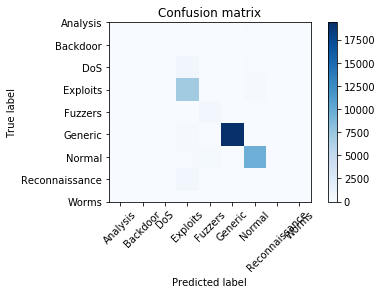

Precision score : 0.9226718315949332
Recall score    : 0.9289939332659252
F1 score        : 0.9171221619455653

              precision    recall  f1-score   support

           0       0.95      0.10      0.18       185
           1       1.00      0.03      0.05        36
           2       0.56      0.10      0.17       881
           3       0.81      0.95      0.87      7392
           4       0.62      0.79      0.70       730
           5       1.00      0.99      0.99     19572
           6       0.94      0.96      0.95      9970
           7       0.54      0.18      0.27       744
           8       0.42      0.10      0.16        50

    accuracy                           0.93     39560
   macro avg       0.76      0.47      0.48     39560
weighted avg       0.92      0.93      0.92     39560



In [357]:
import numpy as np
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix for Fully connected Nueral Network model
cm = confusion_matrix(y_true, pred)
print(cm)

#attack_cat = encode_text_index(df1,"attack_cat")
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, attack_cat)
plt.show()

pr_score = metrics.precision_score(y_true, pred,average='weighted')
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred,average='weighted')
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred,average='weighted')
print("F1 score        : {}".format(f1_score))

print()

print(classification_report(y_true, pred))

## Feature Selection:

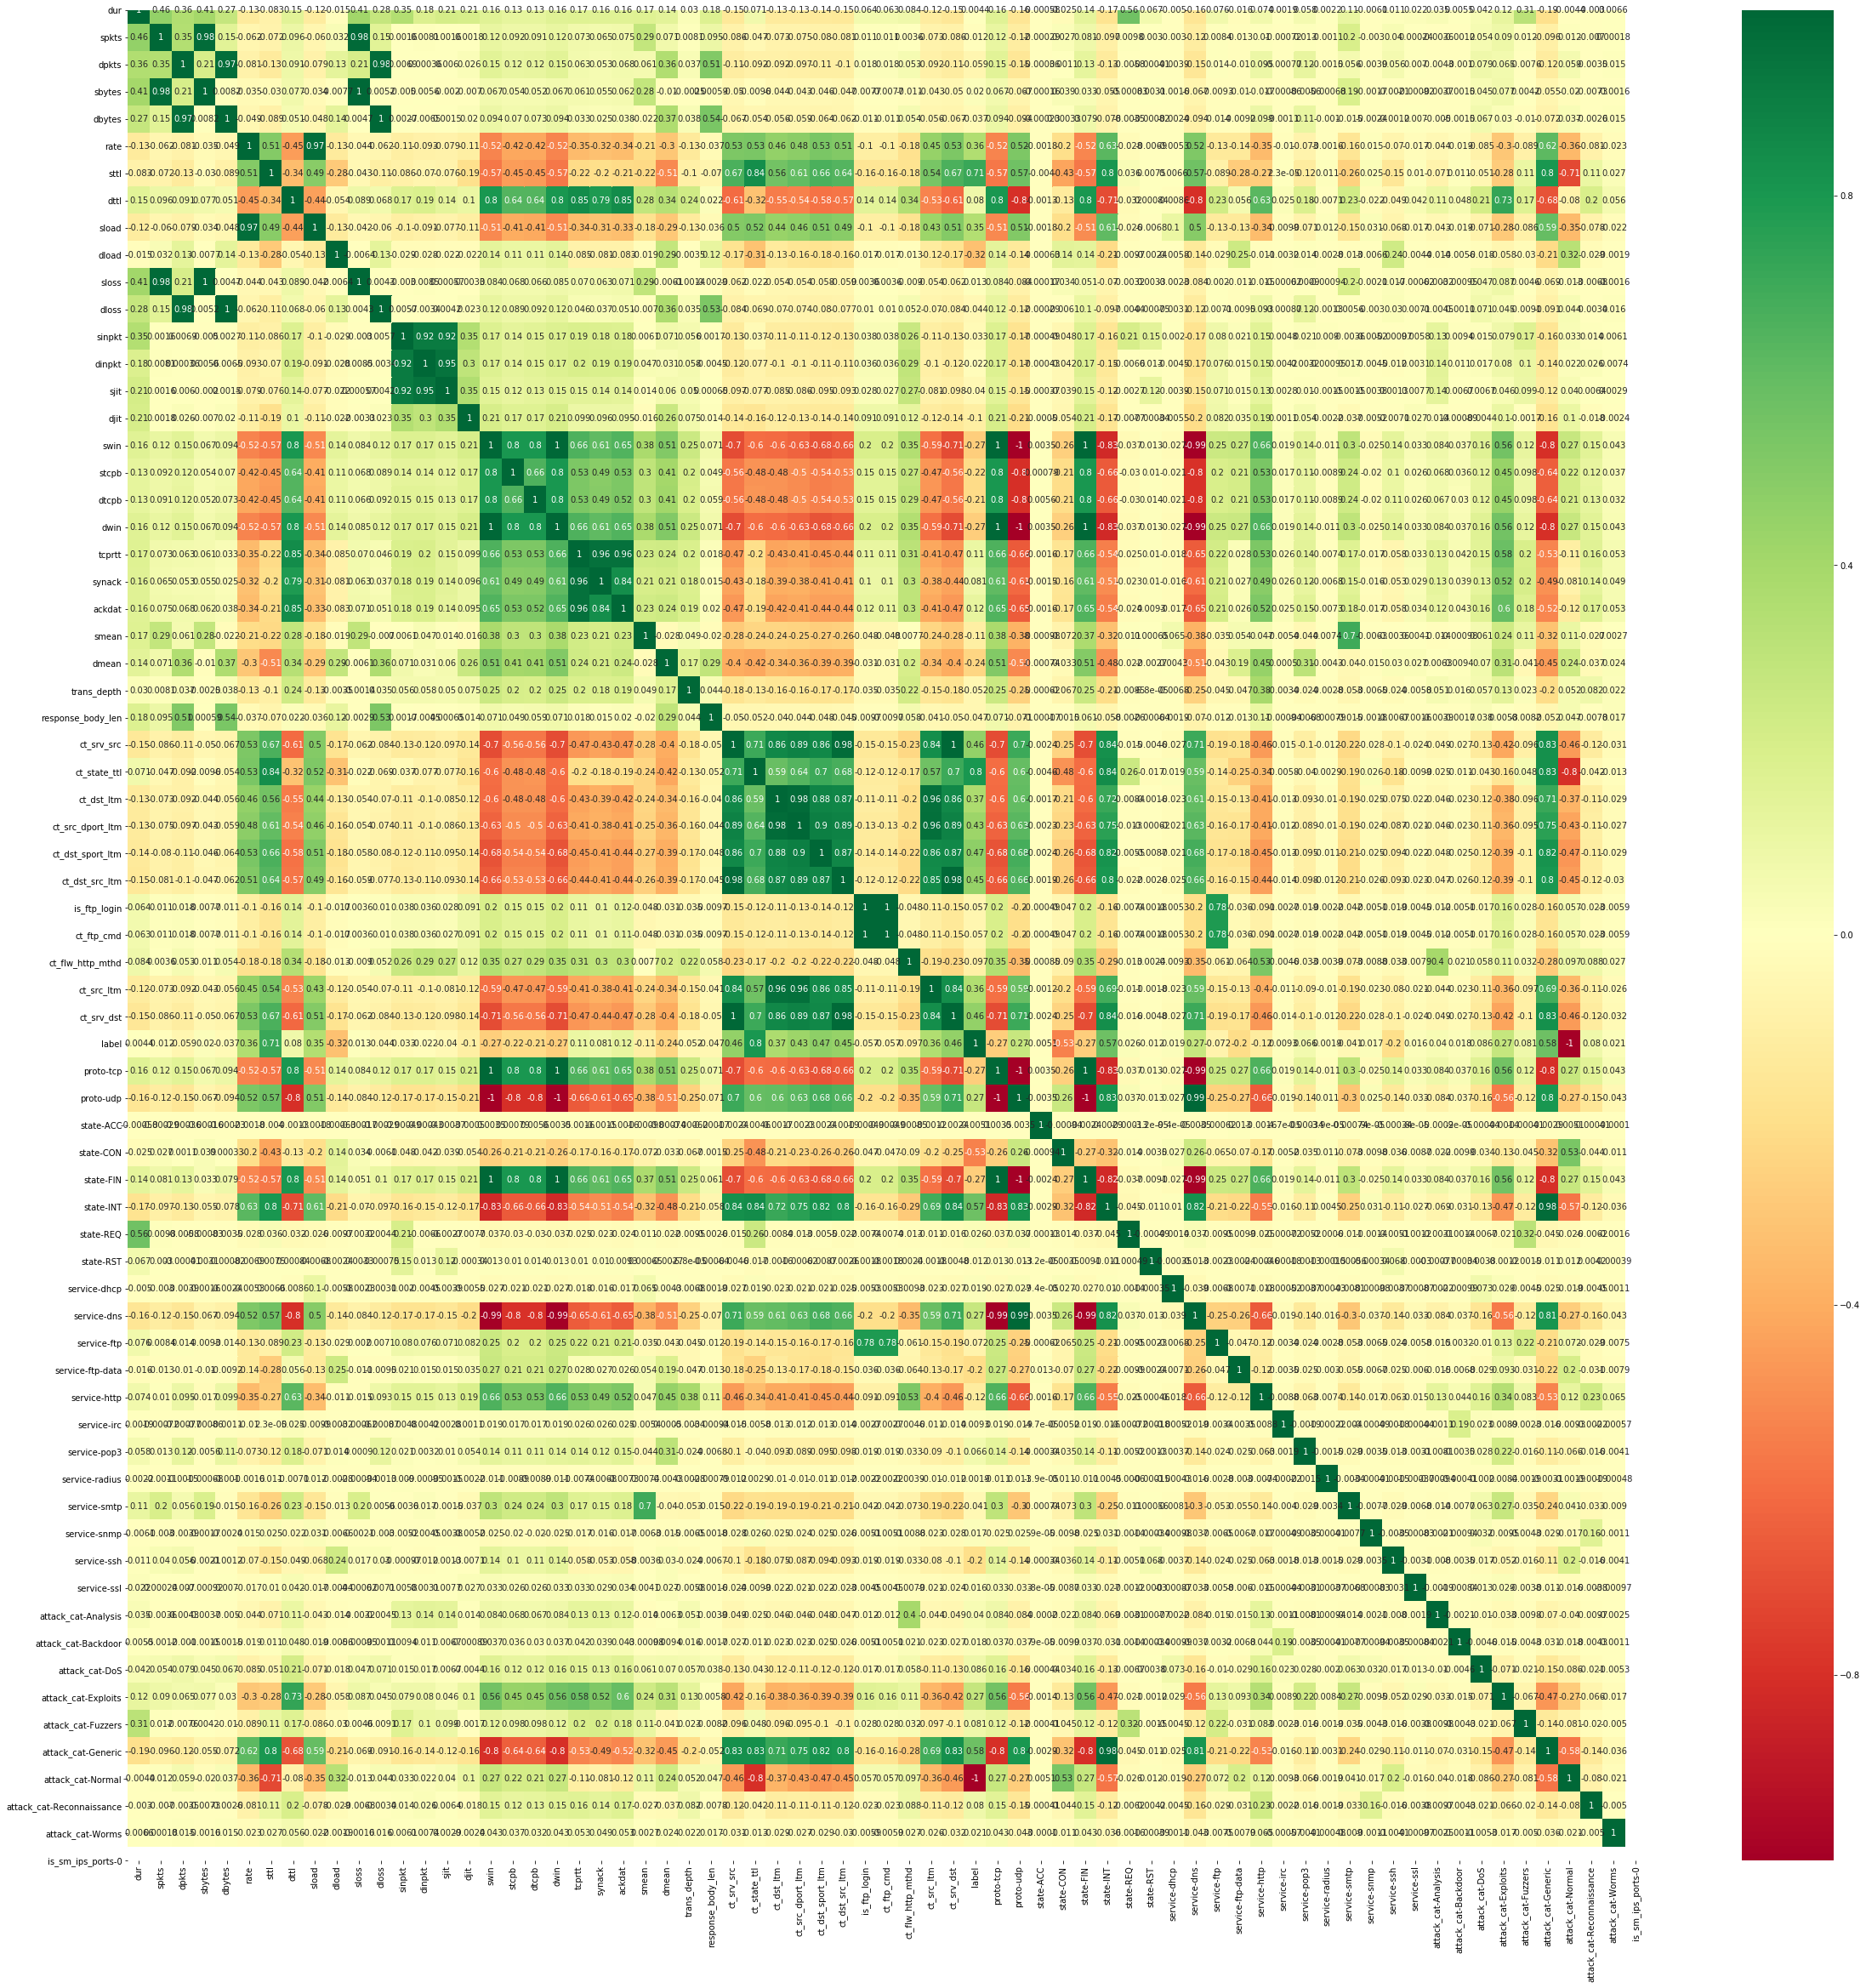

In [358]:
#Using Pearson Correlation
import seaborn as sns

plt.figure(figsize=(40,40))
cor = df.corr(method="pearson")
sns.heatmap(cor, annot=True, cmap="RdYlGn")
plt.show()

In [359]:
cor_target = abs(cor["label"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

rate                  0.358649
sttl                  0.714563
sload                 0.346997
dload                 0.324510
ct_srv_src            0.459378
ct_state_ttl          0.801607
ct_dst_ltm            0.369918
ct_src_dport_ltm      0.429394
ct_dst_sport_ltm      0.472509
ct_dst_src_ltm        0.446370
ct_src_ltm            0.358125
ct_srv_dst            0.456873
label                 1.000000
state-CON             0.533149
state-INT             0.572506
attack_cat-Generic    0.575501
attack_cat-Normal     1.000000
Name: label, dtype: float64

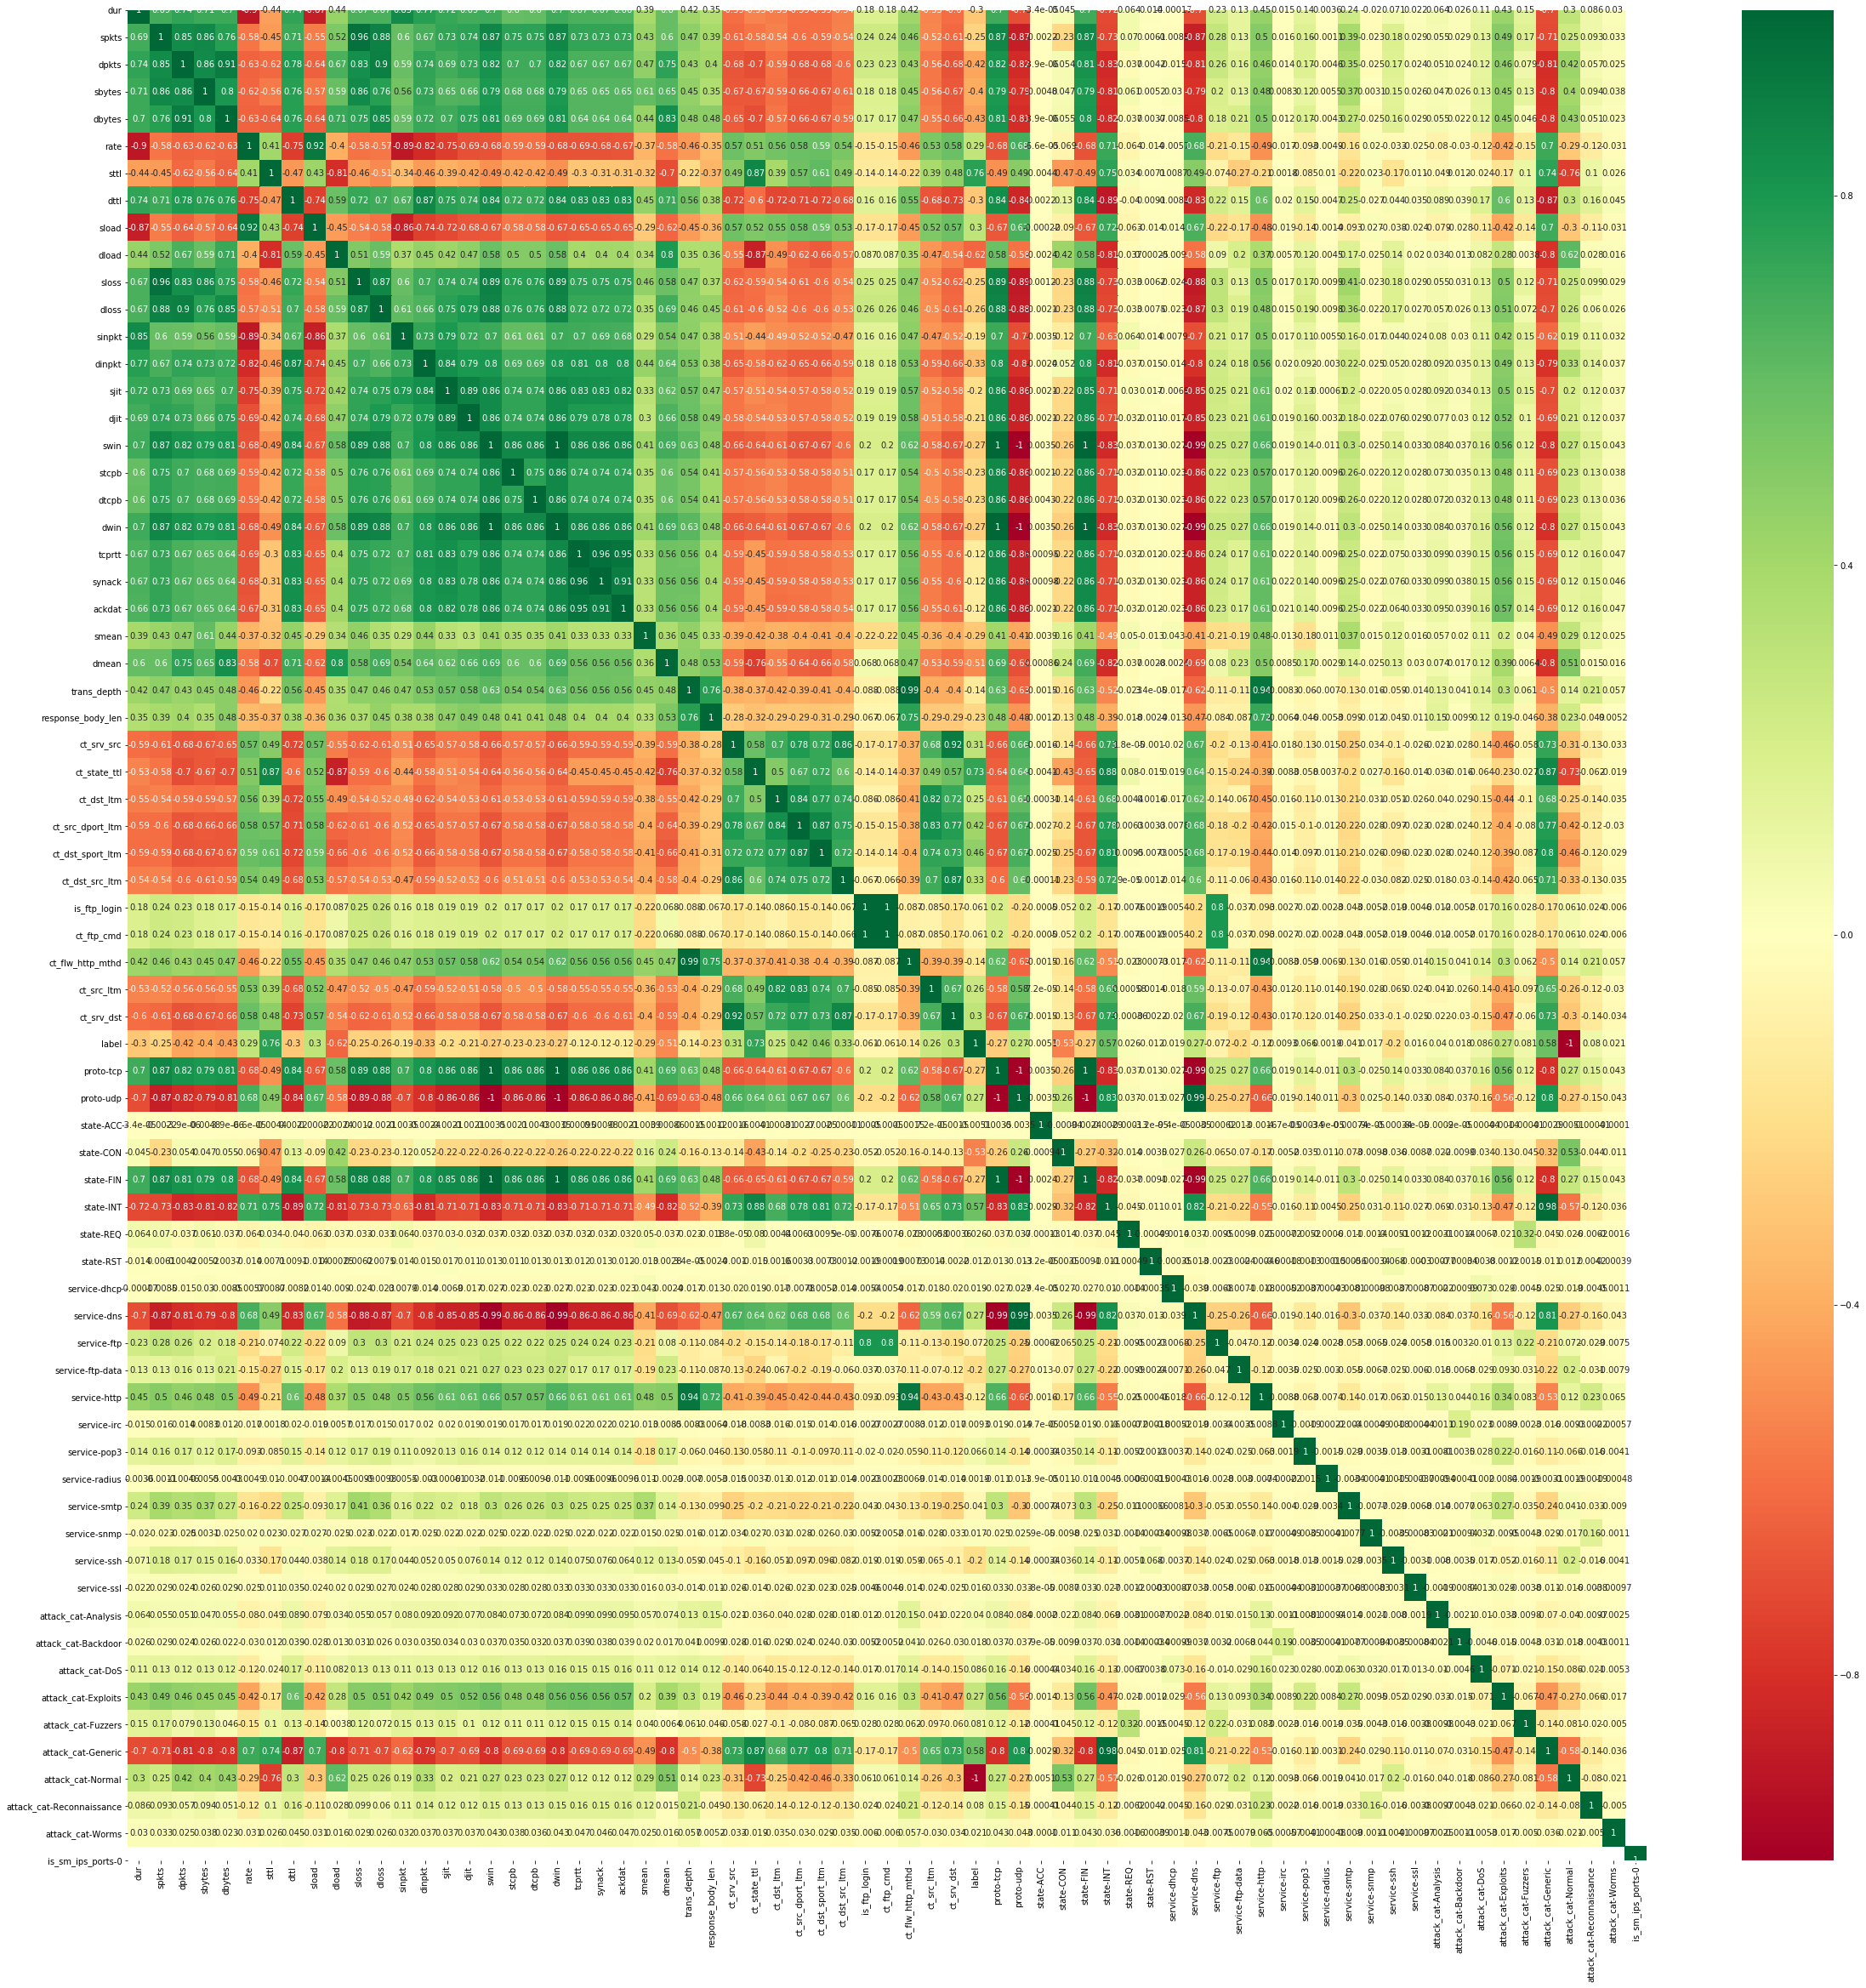

In [360]:
#Using Kendall Correlation
plt.figure(figsize=(40,40))
cor = df.corr(method ='kendall')
sns.heatmap(cor, annot=True, cmap="RdYlGn")
plt.show()

In [362]:
cor_target = abs(cor["label"])
#Selecting highly correlated features
rel_features = cor_target[cor_target>0.3]
rel_features

dpkts                 0.422605
sbytes                0.399932
dbytes                0.430286
sttl                  0.757095
sload                 0.300741
dload                 0.623136
dinpkt                0.329434
dmean                 0.512214
ct_srv_src            0.311027
ct_state_ttl          0.733111
ct_src_dport_ltm      0.418076
ct_dst_sport_ltm      0.462789
ct_dst_src_ltm        0.332357
label                 1.000000
state-CON             0.533149
state-INT             0.572506
attack_cat-Generic    0.575501
attack_cat-Normal     1.000000
Name: label, dtype: float64

In [363]:
#Chi Square
from sklearn.feature_selection import chi2
x_t,y_t= to_xy(abs(df),"label")

In [364]:
chi_scores = chi2(x_t,y_t)

In [365]:
chi_scores
p_values = pd.Series(chi_scores[1])
p_values.sort_values(ascending = False , inplace = True)

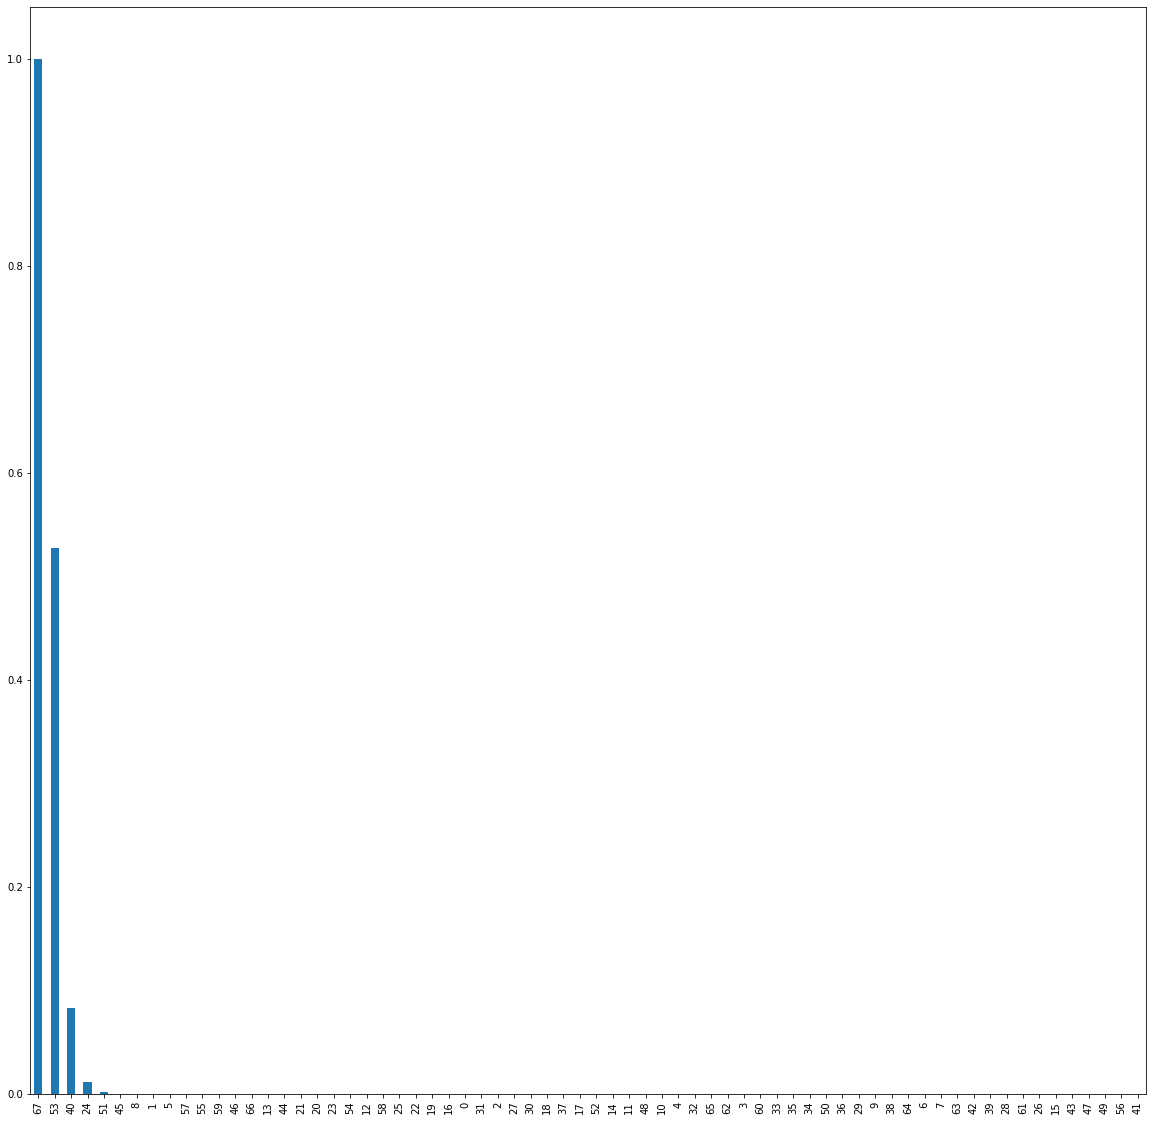

In [366]:
p_values.plot.bar(figsize=(20,20))

In [367]:
df4=pd.DataFrame(df, columns=["dpkts","sbytes","dbytes","sttl","sload","dload","dinpkt","dmean"
                                  ,"ct_srv_src","ct_state_ttl","ct_src_dport_ltm","ct_dst_sport_ltm","ct_dst_src_ltm"
                                  ,"label","state-CON","state-INT","attack_cat-Generic","attack_cat-Normal"])
df4

dpkts    sbytes    dbytes      sttl     sload     dload    dinpkt  \
35     -0.069046 -0.052843 -0.071703 -1.059697 -0.617408 -0.207230  0.301789   
40     -0.054114 -0.052801 -0.071172 -1.059697 -0.617434 -0.209714  0.424343   
45     -0.069046 -0.052784 -0.071918 -1.059697 -0.617412 -0.208102  0.330388   
49     -0.054114 -0.052893 -0.070336 -1.059697 -0.617409 -0.205225  0.214493   
72     -0.069046 -0.052498 -0.071997 -1.059697 -0.617419 -0.209637  0.483207   
...          ...       ...       ...       ...       ...       ...       ...   
257667 -0.128774 -0.055797 -0.078325  0.812896  0.338041 -0.215856 -0.146721   
257668 -0.128774 -0.055797 -0.078325  0.812896  0.019533 -0.215856 -0.146721   
257670 -0.128774 -0.055797 -0.078325  0.812896  0.019533 -0.215856 -0.146721   
257671 -0.128774 -0.055797 -0.078325  0.812896  0.019533 -0.215856 -0.146721   
257672 -0.128774 -0.055797 -0.078325  0.812896  0.019533 -0.215856 -0.146721   

           dmean  ct_srv_src  ct_state_ttl  ct_src_dport_ltm  \
35      0.116394   -0.832542     -0.363132         -0.770077   
40      0.035370   -0.832542     -0.363132         -0.770077   
45      0.096138   -0.905049     -0.363132         -0.770077   
49      0.092087   -0.832542     -0.363132         -0.770077   
72      0.088036   -0.905049     -0.363132         -0.770077   
...          ...         ...           ...               ...   
257667 -0.479138    2.285245      0.851085          2.244136   
257668 -0.479138    0.762605      0.851085          1.396388   
257670 -0.479138   -0.107476      0.851085         -0.581689   
257671 -0.479138    1.197645      0.851085          1.961553   
257672 -0.479138    1.197645      0.851085          1.961553   

        ct_dst_sport_ltm  ct_dst_src_ltm  label  state-CON  state-INT  \
35             -0.825658       -0.798000      0          0          0   
40             -0.825658       -0.798000      0          0          0   
45             -0.825658       -0.869575      0          0          0   
49             -0.825658       -0.798000      0          0          0   
72             -0.825658       -0.869575      0          0          0   
...                  ...             ...    ...        ...        ...   
257667          1.337890        2.279700      1          0          1   
257668          0.797003        0.776637      1          0          1   
257670         -0.555214       -0.010682      1          0          1   
257671          0.932225        1.206084      1          0          1   
257672          1.202668        1.206084      1          0          1   

        attack_cat-Generic  attack_cat-Normal  
35                       0                  1  
40                       0                  1  
45                       0                  1  
49                       0                  1  
72                       0                  1  
...                    ...                ...  
257667                   1                  0  
257668                   1                  0  
257670                   1                  0  
257671                   1                  0  
257672                   1                  0  

[116352 rows x 18 columns]

In [368]:
x_sf,y_sf = to_xy(df4,"label")

In [369]:
# Split into train/test
x_train_sf, x_test_sf, y_train_sf, y_test_sf= train_test_split(x_sf, y_sf, test_size=0.32, random_state=42)

In [370]:
x_sf.shape

(116352, 17)

In [371]:
#activation function as tanh optimizer as sgd
# Define ModelCheckpoint outside the loop
checkpointer = ModelCheckpoint(filepath=r"C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\bst_weights_et3.hdf5", verbose=2, save_best_only=True) # save best model

for i in range(3):
    print(i)
    
    # Build network
    model = Sequential()
    model.add(Dense(10, input_dim=x_sf.shape[1], activation='tanh'))
    model.add(Dense(5, activation='tanh'))
    model.add(Dense(y_sf.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')

    model.fit(x_train_sf,y_train_sf,validation_data=(x_test_sf,y_test_sf),callbacks=[monitor,checkpointer],verbose=2,epochs=100)



0
Train on 79119 samples, validate on 37233 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.01201, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\bst_weights_et3.hdf5
79119/79119 - 6s - loss: 0.0763 - val_loss: 0.0120
Epoch 2/100

Epoch 00002: val_loss improved from 0.01201 to 0.00528, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\bst_weights_et3.hdf5
79119/79119 - 5s - loss: 0.0078 - val_loss: 0.0053
Epoch 3/100

Epoch 00003: val_loss improved from 0.00528 to 0.00332, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\bst_weights_et3.hdf5
79119/79119 - 5s - loss: 0.0042 - val_loss: 0.0033
Epoch 4/100

Epoch 00004: val_loss improved from 0.00332 to 0.00235, saving model to C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\bst_weights_et3.hdf5
79119/79119 - 5s - loss: 0.0027 - val_loss: 0.0023
Epoch 5/100

Epoch 00005: val_loss improved 

In [372]:
print('Training finished...Loading the best model')  
print()
model.load_weights(r"C:\Users\chama\OneDrive\Desktop\Gowthami\Spring_2020\CSC215\project-1\bst_weights_t2.hdf5") 
# load weights from best model

# Measure accuracy
pred = model.predict(x_test_sf)
pred = np.argmax(pred,axis=1)

y_true = np.argmax(y_test_sf,axis=1)

score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))

Training finished...Loading the best model

Final accuracy: 0.9999194263153655


[[ 9390     3]
 [    0 27840]]
Plotting confusion matrix


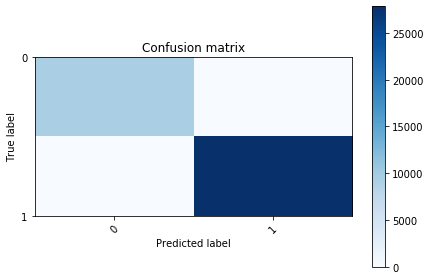

Precision score : 0.9998922529899795
Recall score    : 1.0
F1 score        : 0.9999461235924788

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9393
           1       1.00      1.00      1.00     27840

    accuracy                           1.00     37233
   macro avg       1.00      1.00      1.00     37233
weighted avg       1.00      1.00      1.00     37233



In [373]:
import numpy as np

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Compute confusion matrix for Fully connected Nueral Network model
cm = confusion_matrix(y_true, pred)
print(cm)

label = encode_text_index(df4,"label")
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, label)
plt.show()

pr_score = metrics.precision_score(y_true, pred)
print("Precision score : {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred)
print("Recall score    : {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred)
print("F1 score        : {}".format(f1_score))

print()

print(classification_report(y_true, pred))